In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Input, concatenate, add
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, History

Using TensorFlow backend.


## IMDB：影評資料
## sequence：設輸入文字長度的上限
## Embedding：挑出來的字會用1-hot表示(挑了15000比太多)，可將維度縮小(字和字間基本上是沒有關係)
## LSTM：常用的RNN寫法
## Bidirectional：可以執行雙向RNN，單向RNN只考慮到上文，雙向能考慮上下文

In [2]:
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras.layers import Embedding, LSTM, Bidirectional

num_words可以選挑幾個「最常用」的字，其他當不存在

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=15000)

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=150)
x_test = sequence.pad_sequences(x_test, maxlen=150)

## 要使用多層RNN，必須設定return_sequences = True

In [5]:
e_1 = Embedding(15000, 30)
r_1 = Bidirectional(LSTM(20, activation = 'tanh', dropout = 0.5, return_sequences = True), merge_mode='concat')
r_2 = LSTM(50, activation = 'tanh', dropout = 0.2)
f_1 = Dense(1, activation='sigmoid')

In [6]:
x = Input(shape=(150, ))
h_1 = e_1(x)
h_2 = r_1(h_1)
h_3 = r_2(h_2)
y = f_1(h_3)

In [7]:
model = Model(x, y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 30)           450000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 40)           8160      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                18200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 476,411
Trainable params: 476,411
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

In [9]:
earlystopping = EarlyStopping(monitor='val_acc', 
                              patience=3, 
                              verbose=1, 
                              mode='max')

In [10]:
history = model.fit(x_train, y_train, 
           batch_size=1000, 
           epochs=100, 
           verbose = 1, 
           validation_data = (x_test, y_test), 
           callbacks=[earlystopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/100
25000/25000 [==============================] - 40s 2ms/step - loss: 0.6892 - acc: 0.5740 - val_loss: 0.6697 - val_acc: 0.6928
Epoch 2/100
25000/25000 [==============================] - 36s 1ms/step - loss: 0.5268 - acc: 0.7552 - val_loss: 0.4057 - val_acc: 0.8192
Epoch 3/100
25000/25000 [==============================] - 36s 1ms/step - loss: 0.3455 - acc: 0.8559 - val_loss: 0.3521 - val_acc: 0.8518
Epoch 4/100
25000/25000 [==============================] - 34s 1ms/step - loss: 0.2570 - acc: 0.9005 - val_loss: 0.3259 - val_acc: 0.8656
Epoch 5/100
25000/25000 [==============================] - 37s 1ms/step - loss: 0.2077 - acc: 0.9237 - val_loss: 0.3408 - val_acc: 0.8646
Epoch 6/100
25000/25000 [==============================] - 37s 1ms/step - loss: 0.1763 - acc: 0.9367 - val_loss: 0.3465 - val_acc: 0.8646
Epoch 7/100
25000/25000 [==============================] - 35s 1ms/step - loss: 0.1474 - acc: 0.9501 - val_loss: 0.3678 - 

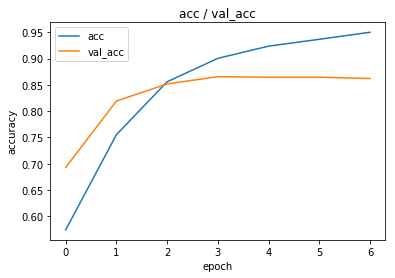

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('acc / val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc = 'best')
plt.show()

In [12]:
model_json = model.to_json()
open("LSTM_test.json",'w').write(model_json)
model.save_weights("LSTM_test.h5")